In [40]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import PauliTwoDesign
from qiskit.opflow import Z, StateFn
from qiskit.quantum_info import Statevector

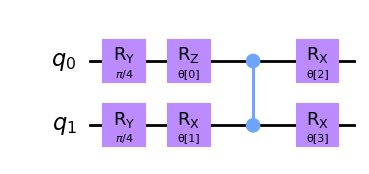

In [27]:
ansatz = PauliTwoDesign(2, reps=1, seed=2)
ansatz.decompose().draw(output='mpl')


In [42]:
observable = Z ^ Z
initial_point = np.random.random(ansatz.num_parameters)
initial_point

array([0.87786382, 0.95541077, 0.94355138, 0.35015607])

In [43]:
StateFn(observable, is_measurement=True)

C:\Users\Dimitri\AppData\Local\Temp\ipykernel_21972\3073348473.py:1: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  StateFn(observable, is_measurement=True)


OperatorStateFn(PauliOp(Pauli('ZZ'), coeff=1.0), coeff=1.0, is_measurement=True)

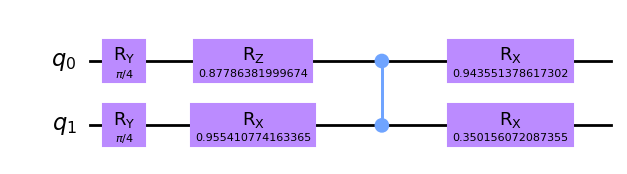

In [46]:
bound = ansatz.bind_parameters(initial_point)
bound.decompose().draw(output='mpl')

In [33]:
def loss(x):
    bound = ansatz.bind_parameters(x)
    return np.real((StateFn(observable, is_measurement=True) @ StateFn(bound)).eval())

In [50]:
two_spsa = SPSA(maxiter=300, second_order=True)
result = two_spsa.optimize(ansatz.num_parameters, loss, initial_point=initial_point)

C:\Users\Dimitri\AppData\Local\Temp\ipykernel_21972\411750411.py:2: DeprecationWarning: The method ``qiskit.algorithms.optimizers.spsa.SPSA.optimize()`` is deprecated as of qiskit-terra 0.21.0. It will be removed no earlier than 3 months after the release date. Instead, use ``SPSA.minimize`` as a replacement, which supports the same arguments but follows the interface of scipy.optimize and returns a complete result object containing additional information.
  result = two_spsa.optimize(ansatz.num_parameters, loss, initial_point=initial_point)
C:\Users\Dimitri\AppData\Local\Temp\ipykernel_21972\3439785269.py:3: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  return np.real((StateFn(observable, is_measurement=True) @ StateFn(bound)).eval())
C:\Users\Dimitri\AppData\L

In [52]:
(params, value, _) = result

In [53]:
params

array([-16.45639944, -11.42990129, -21.27221165,  17.85734486])

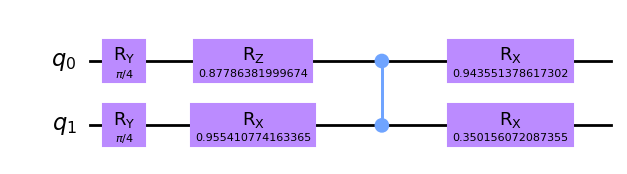

In [57]:
bound = ansatz.bind_parameters(initial_point)
bound.decompose().draw(output='mpl')

In [58]:
Statevector(bound)

Statevector([ 0.51266861-0.5771036j ,  0.06934243-0.14490635j,
              0.04655544-0.44649802j, -0.42013283+0.01663208j],
            dims=(2, 2))


In [59]:
value

-0.8660231393539213